In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import joblib

df = pd.read_json("generated_proj_data.json")
df

,Employee_id,Manager_id,Managed,Name,Phone_number,Job_role,Status,Work_location,Salary
0,1,1,2,Robert,7540823494,Backware,Manager,WFH,116878
1,2,2,3,Patricia,1309668048,Middleware,HR,Toronto,94237
2,3,3,4,Mary,1373918940,Hardware,Manager,WFH,75085
3,4,4,5,Michael,6351667943,Backware,Manager,North Pole,104926
4,5,5,6,Robert,6378202948,Frontware,Manager,WFH,69594
...,...,...,...,...,...,...,...,...,...
995,996,996,997,James,6014655188,Backware,HR,Toronto,92946
996,997,997,998,James,1140494757,Software,Employee,North Pole,118656
997,998,998,999,Robert,3965467837,Software,Employee,Toronto,79283
998,999,999,1000,James,7843633083,Frontware,Employee,South Pole,95903


#### Some Data Visualization

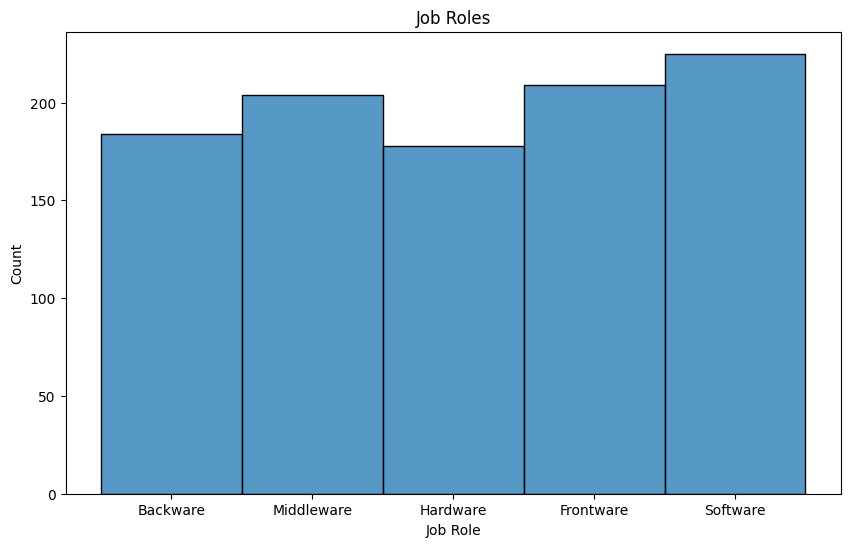

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Job_role'])
plt.title("Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.show()

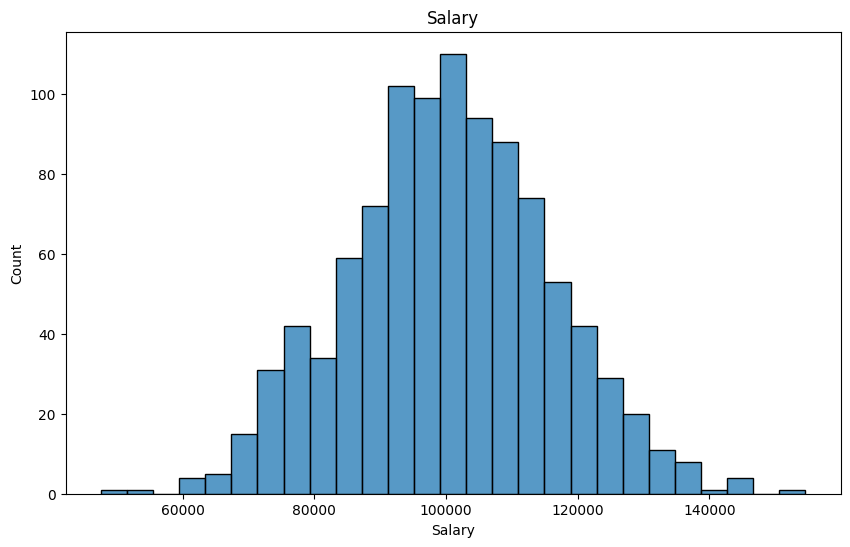

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'])
plt.title("Salary")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

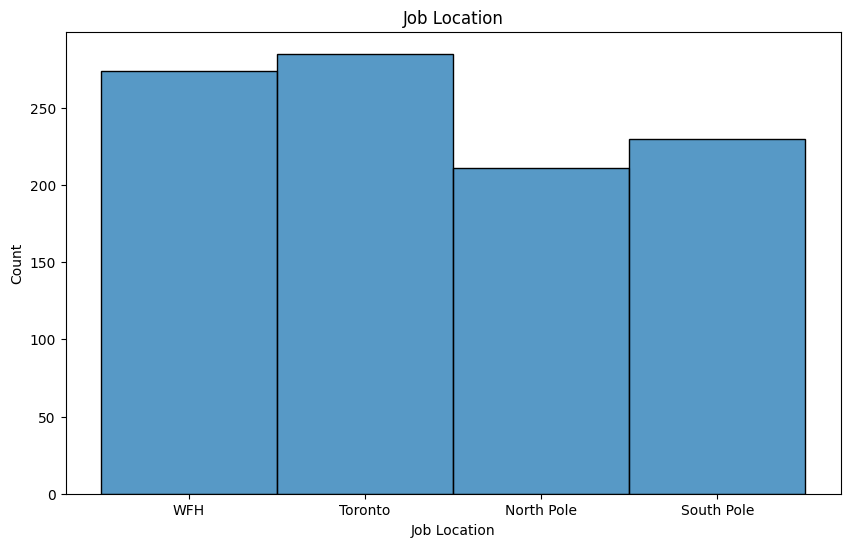

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Work_location'])
plt.title("Job Location")
plt.xlabel("Job Location")
plt.ylabel("Count")
plt.show()

### Linear Regression modelling

In [6]:
#X = df_encoded.drop(columns=['Employee_id', 'Name', 'Phone_number', 'Salary',]) 
X = df[['Job_role', 'Work_location']]
y = df['Salary']

X

,Job_role,Work_location
0,Backware,WFH
1,Middleware,Toronto
2,Hardware,WFH
3,Backware,North Pole
4,Frontware,WFH
...,...,...
995,Backware,Toronto
996,Software,North Pole
997,Software,Toronto
998,Frontware,South Pole


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

model = LinearRegression()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test) 

# Evaluate model w/ R-squared and Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



ValueError: could not convert string to float: 'Middleware'

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [ ]:
# Distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_pred - y_test, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Predicted - Actual)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle 
load_model = pickle.load(open("trained_model.pkl", 'rb')) 


In [ ]:
X = get_dummies
result = load_model.predict(X)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

data = [["Backware", "Toronto"]]
enc = OneHotEncoder()
a = enc.fit(data)

In [ ]:
import joblib
import pandas as pd
import pickle

# Load the encoders and model
job_role_encoder_loaded = joblib.load('job_role_encoder.joblib')
work_location_encoder_loaded = joblib.load('work_location_encoder.joblib')
model_loaded = pickle.load(open('trained_model.pkl', 'rb'))

# New data point
new_data = {
    'Job_role': ['Software'],
    'Work_location': ['WFH']
}
new_data_df = pd.DataFrame(new_data)

# Transform the new data point using the loaded encoders
new_data_df['Job_role_encoded'] = job_role_encoder_loaded.transform(new_data_df['Job_role'])
new_data_df['Work_location_encoded'] = work_location_encoder_loaded.transform(new_data_df['Work_location'])

# Define the final new data point for prediction
X_new = new_data_df[['Job_role_encoded', 'Work_location_encoded']]

# Predict the salary for the new data point
predicted_salary = model_loaded.predict(X_new)
print(f"Predicted Salary: {predicted_salary[0]}")
